<a href="https://colab.research.google.com/github/MilkSilk/k-means_image_compression/blob/main/k-means_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Załadowanie obrazu
2. Przeiterowanie po każdym pikselu
3. Zebranie pikseli do listy do k-means
4. Zrobienie k-means
5. Stworzenie nowego obrazka na podstawie centroidów

In [30]:
from PIL import Image
from sklearn.cluster import KMeans

im = Image.open("doggo.jpg")

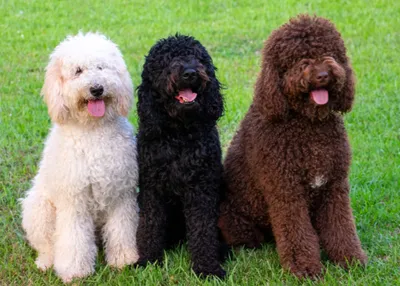

In [31]:
im

In [32]:
im.getpixel((0,0))

(148, 195, 97)

In [41]:
pixels = []
for col in range(im.width):
    for row in range(im.height):
        pixels.append(im.getpixel((col, row)))

In [34]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(pixels)

KMeans(n_clusters=50)

In [35]:
assigned_centroids = kmeans.predict(pixels)

In [36]:
cluster_centers = []
for centroid in kmeans.cluster_centers_:
    cluster_centers.append([int(x) for x in list(centroid)])

In [14]:
new_image = Image.new("RGB", (im.width, im.height), color=0)
for col in range(new_image.width):
    for row in range(new_image.height):
        new_image.putpixel((col, row), tuple(cluster_centers[assigned_centroids[col*new_image.height+row]]))

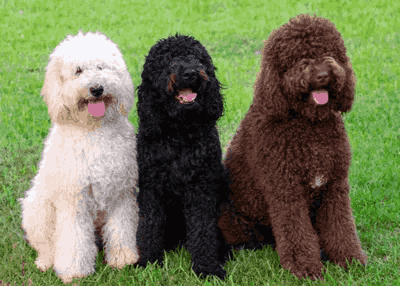

In [15]:
new_image

Teraz 20 centroidów

In [16]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(pixels)

KMeans(n_clusters=20)

In [17]:
assigned_centroids = kmeans.predict(pixels)

In [18]:
cluster_centers = []
for centroid in kmeans.cluster_centers_:
    cluster_centers.append([int(x) for x in list(centroid)])

In [19]:
new_image = Image.new("RGB", (im.width, im.height), color=0)
for col in range(new_image.width):
    for row in range(new_image.height):
        new_image.putpixel((col, row), tuple(cluster_centers[assigned_centroids[col*new_image.height+row]]))

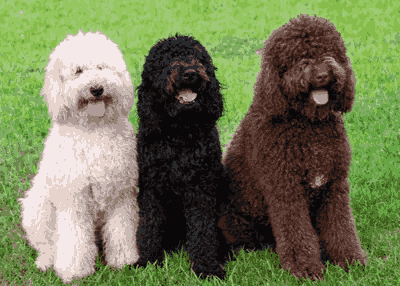

In [20]:
new_image

I 5 centroidów

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)

KMeans(n_clusters=5)

In [22]:
assigned_centroids = kmeans.predict(pixels)

In [23]:
cluster_centers = []
for centroid in kmeans.cluster_centers_:
    cluster_centers.append([int(x) for x in list(centroid)])

In [24]:
new_image = Image.new("RGB", (im.width, im.height), color=0)
for col in range(new_image.width):
    for row in range(new_image.height):
        new_image.putpixel((col, row), tuple(cluster_centers[assigned_centroids[col*new_image.height+row]]))

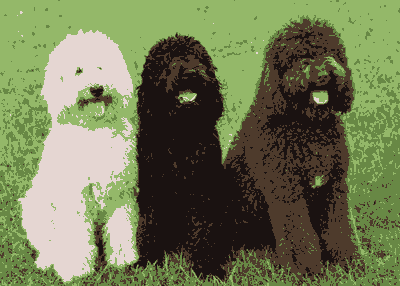

In [25]:
new_image

In [26]:
def compress_image(pixels, width, height, k):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pixels)
  assigned_centroids = kmeans.predict(pixels)
  cluster_centers = []
  for centroid in kmeans.cluster_centers_:
      cluster_centers.append([int(x) for x in list(centroid)])
  new_image = Image.new("RGB", (width, height), color=0)
  for col in range(new_image.width):
      for row in range(new_image.height):
          new_image.putpixel((col, row), tuple(cluster_centers[assigned_centroids[col*new_image.height+row]]))
  return(new_image)

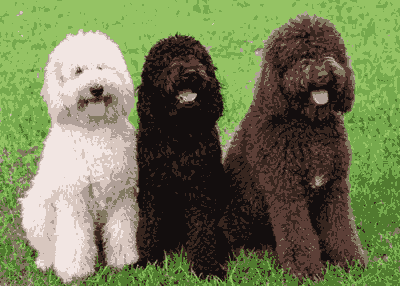

In [27]:
compress_image(pixels, im.width, im.height, 10)

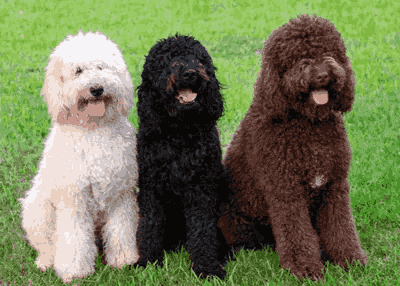

In [28]:
compress_image(pixels, im.width, im.height, 30)